In [34]:
#calcuration libraries
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Initial conditions

In [35]:
d = 12 * 10**(-3)#0.0118
L = 2
#Re_lam = np.linspace(0,2300,)
#Re_b = np.linspace(2300,4000,)
#Re_turb = np.linspace(4000,10000,)
Re_lam = np.linspace(0,2300,)
Re_b = np.linspace(2300,10000,)
Re_turb = np.linspace(10000,100000,)
Pr = 21
Gz = d * Re_lam * Pr / L
b = 0.3

### Skinf friction

In [36]:
#Skin friction for laminar flow
Cf_lam = 16 / Re_lam
#skin friction for turbulent flow(Konakov1954)
Cf_turb = 0.25*(1.8*np.log10(Re_turb)-1.5)**(-2)

/Users/yoshi/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


Text(0,0.5,'Skin friction Cf$\\,\\mathrm{[-]}$')

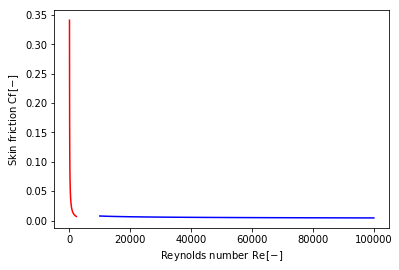

In [37]:
plt.plot(Re_lam, Cf_lam, color='red')
plt.plot(Re_turb, Cf_turb, color='blue')
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Skin friction Cf$\,\mathrm{[-]}$')

In [38]:
#Christphan2018 thesis
#Gnielinski correlstion
#Nu_turb = ((Cf_turb * Re_turb * Pr / 2) / (1 + 12.7 * (Cf_turb / 2)**(1/2) * (Pr**(2/3) - 1))) * (Pr_b / Pr_w)**0.11
Nu_lam_c = (3.66**3 + 0.7**3 + (1.615 * (Re_lam * Pr * d / L)**(1/3))**3)**(1/3)

### Laminar flow_Uniform wall temperature (UWT)

In [39]:
Nu_1_uwt = 3.66
Nu_2_uwt = 1.615 * Gz**(1/3)
Nu_3_uwt = (2/(1 + 22*Pr))**(1/6) * Gz
Nu_lam_uwt = (Nu_1_uwt**3 + b + (Nu_2_uwt - b)**3 + Nu_3_uwt**3)**(1/3)

### Laminar flow_Uniform heat flux (UHF)

In [40]:
Nu_1_uhf = 4.364
Nu_2_uhf = 1.953 * Gz**(1/3)
Nu_3_uhf = 0.924 * Pr**(1/3) * (Re_b * d / L)**(1/2)
Nu_lam_uhf = (Nu_1_uhf**3 + b + (Nu_2_uhf - b)**3 + Nu_3_uhf**3)**(1/3)
print(Nu_lam_uhf)

[ 9.77032859 10.1799462  10.57931494 10.96110777 11.32650688 11.67710995
 12.01441567 12.33974216 12.65423005 12.95886406 13.25449665 13.54186923
 13.82163003 14.09434896 14.36052969 14.62061969 14.87501836 15.12408385
 15.36813866 15.60747433 15.84235545 16.0730229  16.29969677 16.52257868
 16.74185396 16.95769334 17.17025453 17.37968357 17.58611599 17.78967782
 17.99048652 18.18865174 18.38427606 18.57745558 18.76828049 18.95683557
 19.14320061 19.32745086 19.50965732 19.68988711 19.86820376 20.04466744
 20.21933525 20.39226139 20.56349739 20.73309227 20.90109275 21.06754335
 21.23248654 21.39596289]


### Turbulent flow

In [41]:
xi = (1.8 * np.log10(Re_turb) - 1.5)**(-2)
Nu_turb = ((xi/8 * Re_turb * Pr) / (1 + 12.7 * (xi/8)**0.5 * (Pr**(2/3) - 1))) * (1 + (d/L)**(2/3))
print(Nu_turb)

[134.43629359 154.9546583  175.04812818 194.7859773  214.21922957
 233.38690489 252.3197299  271.04247572 289.57550074 307.93580826
 326.13779462 344.19379265 362.11447559 379.90916324 397.586058
 415.15242969 432.61476227 449.97887165 467.25000135 484.43290099
 501.53189118 518.55091776 535.49359724 552.36325542 569.16296017
 585.89554956 602.56365613 619.16972782 635.71604628 652.20474281
 668.63781235 685.01712588 701.34444126 717.62141298 733.84960076
 750.03047726 766.16543498 782.25579247 798.30279991 814.30764417
 830.27145337 846.19530099 862.08020971 877.92715479 893.7370672
 909.51083654 925.24931364 940.95331294 956.6236148  972.26096744]


### Transitional

In [42]:
#Re_bulk = 2300
#C = (Nu_1_uhf**3 + b + (Nu_2_uhf - b)**3 + Nu_3_uhf**3)**(1/3)
c1 = 21
c2 = 134

In [43]:
r = (Re_b - 2300) / (10**4 - 2300)
Nu_tran = (1 - r) * c1 + r * c2
print(r)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


### Graph

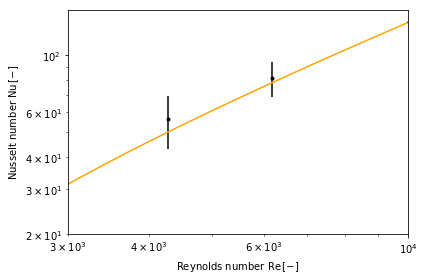

In [67]:
plt.xlim(3000,10000)
plt.ylim(20,150)
#plt.plot(Re_lam, Nu_lam_uwt, color='pink')
#x = np.arange(1000,10000, 100)
plt.loglog(Re_lam, Nu_lam_uhf, color='red')
#plt.plot(Re_lam, Nu_lam_c, color='black')
plt.loglog(Re_b, Nu_tran, color='orange')
plt.loglog(Re_turb, Nu_turb, color='blue')
#plt.loglog(4275, 56, color='blue', ..)
plt.errorbar(4275, 56.03, yerr=13.2, fmt='.k');
plt.errorbar(6172, 81.15, yerr=12.4, fmt='.k');
#plt.errorbar(2659, 304, yerr=58.36, fmt='.k');
plt.xlabel(r'Reynolds number Re$\,\mathrm{[-]}$')
plt.ylabel(r'Nusselt number Nu$\,\mathrm{[-]}$')
#plt.rcParams["font.size"] = 14
OutPutFig = 'fig/uncertainty.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)